# Linearna regresija

**ZADATAK:** Kreirati model linearne regresije koji predviđa vidljivost u km na osnovu dostupnih podataka o drugim parametrima vremenske prognoze za grad Segedin. Podaci u bazi prikupljani su u periodu 2006-2016.

**Napomena:** Za sva postavljena pitanja, napisati odgovore u novim tekstualnim ćelijama ispod poziva komandi.

In [111]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets

# Upoznavanje baze podataka

In [112]:
# preuzimanje baze
!gdown 1NpFP8jxoW-CwL4v73wigrg7hI7DfK3nN

Downloading...
From: https://drive.google.com/uc?id=1NpFP8jxoW-CwL4v73wigrg7hI7DfK3nN
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 57.6MB/s]


Učitati bazu podataka u Pandas DataFrame i prikazati prvih 5 uzoraka.

In [113]:
# weatherHistory.csv
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


*   Koliko ima uzoraka?
*   Koliko ima obeležja?
*   Kog su tipa obeležja?


In [114]:
print(df.shape)

(96453, 12)


Analizirati kategorička obeležja.

*   Koje su im jedinstvene vrednosti?



In [115]:
df['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [116]:
df['Daily Summary'].unique()

array(['Partly cloudy throughout the day.',
       'Mostly cloudy throughout the day.', 'Foggy in the evening.',
       'Foggy overnight and breezy in the morning.',
       'Overcast throughout the day.', 'Partly cloudy until night.',
       'Mostly cloudy until night.',
       'Foggy starting overnight continuing until morning.',
       'Foggy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy starting in the morning.',
       'Mostly cloudy starting overnight continuing until night.',
       'Mostly cloudy until evening.',
       'Partly cloudy starting in the morning continuing until evening.',
       'Partly cloudy starting in the afternoon.',
       'Partly cloudy starting overnight.',
       'Partly cloudy until morning.',
       'Partly cloudy starting overnight continuing until night.',
       'Partly cloudy starting in the afternoon continuing until night.',
       'Mostly cloudy starting overnight.',
       'Partly cloudy until afternoon.',
       'Mostly

In [117]:
df['Wind Bearing (degrees)'].unique()

array([251., 259., 204., 269., 258., 260., 279., 290., 316., 281., 289.,
       262., 288., 230., 163., 139., 147., 160., 152., 150., 149., 180.,
       161., 135., 141., 151., 169., 170., 187., 179., 162., 159., 168.,
        32., 140., 103., 113., 129., 207., 153.,   4., 341.,  15., 348.,
       321., 311., 339., 340., 330.,  19., 277.,   9.,   0., 350., 349.,
       338., 320., 310., 328.,  20.,  28.,  11., 326., 309., 193., 273.,
       300., 307., 319., 318., 243., 177., 172., 142., 130., 359., 166.,
       145., 178., 223., 240., 231., 214., 222., 241., 235., 238., 211.,
       221., 215., 224., 358.,   8.,  59.,  63.,  65., 146., 305., 327.,
       271., 297., 301., 308., 272., 351., 175., 138., 158., 132., 209.,
       250., 295., 280., 270., 239., 242., 266., 278., 325., 282., 274.,
       255.,  46., 284., 283., 313., 345.,  16., 332.,  12.,  39.,   3.,
        33.,  24.,  25.,  31.,  47.,  67.,  60., 144.,  57.,   2.,  18.,
        48.,  29., 335., 228., 315.,  40., 143., 13

In [118]:
df['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

Izračunati statističke vrednosti za sve numeričke varijable.

In [119]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Za sada, izbaciti iz baze sva kategorička obeležja osim padavina `Precip Type` i pravca vetra `Wind Bearing (degrees)`.

*   Šta raditi obeležjem datum?

*   Šta raditi sa obeležjem `Cloud cover` (koje su vrednosti tog obeležja)?

✅ 2. Šta raditi sa obeležjem Formatted Date?
📅 Opcije:
➤ Ako ti ne treba vremenska dimenzija (da ne treniraš model koji predviđa sezonski ili vremenski trend) → izbaci:
python
Copy
Edit
df = df.drop(['Formatted Date'], axis=1)
➤ Ako želiš da zadržiš informaciju o vremenu:
Parsuj datum i ekstraktuj npr. mesec, godinu, sat itd.:

python
Copy
Edit
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df['Month'] = df['Formatted Date'].dt.month
df['Hour'] = df['Formatted Date'].dt.hour
Možeš onda da izbaciš originalnu kolonu.

In [120]:
df=df.drop(['Summary','Daily Summary', 'Formatted Date', 'Loud Cover'], axis=1)

U promenljivu `X` staviti sva obeležja na osnovu kojih će se vršiti predviđanje, a u promenljivu `y` staviti onu promenljivu čije će se vrednosti predviđati regresionim modelom (`Visibility (km)`).

*   Koliko ima uzoraka i obeležja?

Prikazati prvih 5 uzoraka.

U nastavku koristiti promenljive `X` i `y`.

In [121]:
# TODO
X=df.drop(['Visibility (km)'], axis=1)
y=df['Visibility (km)']
print(X.shape)
print(X.columns)
X.head()

(96453, 7)
Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Pressure (millibars)'],
      dtype='object')


,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,1016.51


*   Koje su moguće vrednosti za padavine iz obeležja `Percip Type`?
*   Šta predstavljaju `nan` vrednosti ovde?

In [122]:
X['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

Prebaciti vrednosti obeležja `Percip Type` u numeričke vrednosti kreiranjem dummy varijabli i rešiti problem nedostajućih vrednosti.

**Napomena:** pogledati dokumentaciju za funkciju [`pandas.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [123]:
X = pd.get_dummies(X, columns=['Precip Type'])
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,1015.13,True,False
1,9.355556,7.227778,0.86,14.2646,259.0,1015.63,True,False
2,9.377778,9.377778,0.89,3.9284,204.0,1015.94,True,False
3,8.288889,5.944444,0.83,14.1036,269.0,1016.41,True,False
4,8.755556,6.977778,0.83,11.0446,259.0,1016.51,True,False
...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,1014.36,True,False
96449,24.583333,24.583333,0.48,10.0947,20.0,1015.16,True,False
96450,22.038889,22.038889,0.56,8.9838,30.0,1015.66,True,False
96451,21.522222,21.522222,0.60,10.5294,20.0,1015.95,True,False


Proveriti da li u bazi ima nedostajućih vrednosti.

In [124]:
X.isna().sum()

,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Pressure (millibars),0
Precip Type_rain,0
Precip Type_snow,0


Izvršiti statističku analizu baze.

*    Da li postoje nemoguće/pogrešne vrednosti u bazi?

In [125]:
X.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,1046.380000


Prikazati raspodelu za obeležje pritiska

*    Može li pritisak biti 0? Kako rešiti problem?

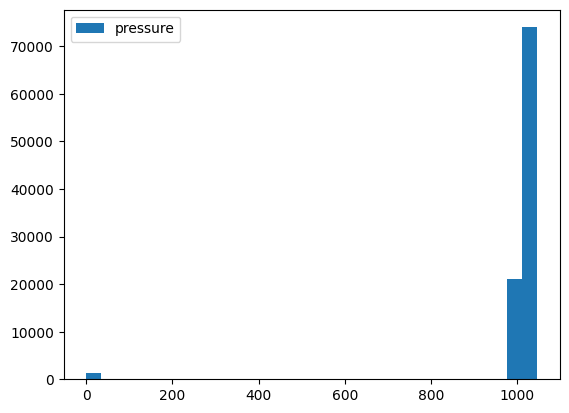

In [126]:
plt.hist(X['Pressure (millibars)'], bins=30, label='pressure')
plt.legend()
plt.show()

In [127]:
X['Pressure (millibars)'] = X['Pressure (millibars)'].replace(0.0, method='ffill')
X.describe()

/tmp/ipython-input-127-3976634148.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  X['Pressure (millibars)'] = X['Pressure (millibars)'].replace(0.0, method='ffill')


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,1016.817525
std,9.551546,10.696847,0.195473,6.913571,107.383428,7.779863
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,973.780000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,1012.120000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,1016.560000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,1021.170000
max,39.905556,39.344444,1.000000,63.852600,359.000000,1046.380000


Nacrtati raspodelu vrednosti varijable `Visibility (km)` koja će se predvidjati modelom linearne regresije i uraditi statističku analizu te promenljive.

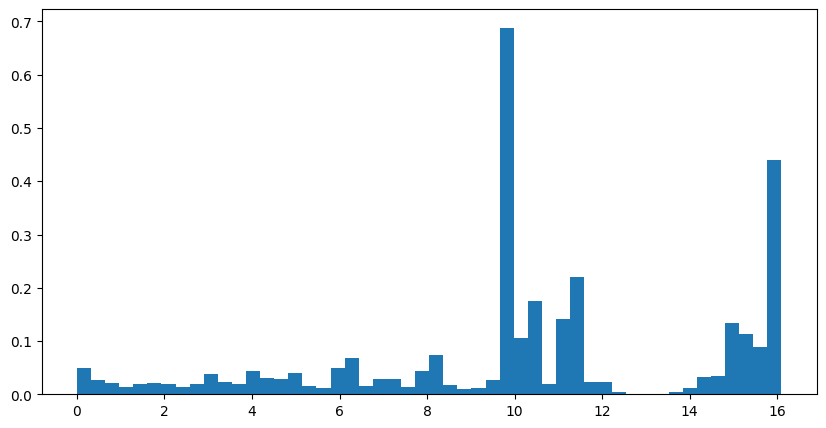

In [128]:
plt.figure(figsize=(10,5))
plt.hist(y, density=True, bins=50)
plt.show()

Kreirati funkciju `get_wind_direction` koja prima numerički parametar `direction` i kao rezultat vraća karakter za pravac vetra prema sledećim pravilima:

*   za `direction` u intervalu [45, 135) $\rightarrow$ `'N'`
*   za `direction` u intervalu [135, 225) $\rightarrow$ `'W'`
*   za `direction` u intervalu [225, 315) $\rightarrow$ `'S'`
*   za sve ostale `direction` vrednosti $\rightarrow$ `'E'`

Primeniti funkciju za pravljenje kategoričke varijable sa navedenim kategorijama (metoda [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)) iz obeležja `Wind Bearing (degrees)`, a potom je pretvoriti u dummy varijable.

**Napomena:** koristiti minimalni broj potrebnih obeležja pri kreiranju dummy varijabli.

In [129]:
def get_wind_direction(direction):
  if 45 <= direction < 135:
    return 'N'
  elif 135 <= direction < 225:
    return 'W'
  elif 225 <= direction < 315:
    return 'S'
  else:
    return 'E'

In [130]:
X['Wind bearing cat'] = X['Wind Bearing (degrees)'].apply(get_wind_direction)
X.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars),Precip Type_rain,Precip Type_snow,Wind bearing cat
0,9.472222,7.388889,0.89,14.1197,251.0,1015.13,True,False,S
1,9.355556,7.227778,0.86,14.2646,259.0,1015.63,True,False,S
2,9.377778,9.377778,0.89,3.9284,204.0,1015.94,True,False,W
3,8.288889,5.944444,0.83,14.1036,269.0,1016.41,True,False,S
4,8.755556,6.977778,0.83,11.0446,259.0,1016.51,True,False,S


In [131]:
X.drop('Wind Bearing (degrees)', axis=1, inplace=True)
X = pd.get_dummies(X, columns=['Wind bearing cat'], drop_first=True)
X.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars),Precip Type_rain,Precip Type_snow,Wind bearing cat_N,Wind bearing cat_S,Wind bearing cat_W
0,9.472222,7.388889,0.89,14.1197,1015.13,True,False,False,True,False
1,9.355556,7.227778,0.86,14.2646,1015.63,True,False,False,True,False
2,9.377778,9.377778,0.89,3.9284,1015.94,True,False,False,False,True
3,8.288889,5.944444,0.83,14.1036,1016.41,True,False,False,True,False
4,8.755556,6.977778,0.83,11.0446,1016.51,True,False,False,True,False


# Normalizacija obeležja

Postoji nekoliko vrsta normalizacije. Samostalno implementirati funkcije za

1.   Normalizaciju na opseg [0,1] \begin{equation}y_i^{norm} = \frac{y_i-y_{min}}{y_{max}-y_{min}}\end{equation}
2.   Z-normalizaciju ili standardizaciju \begin{equation}y_i^{std} = \frac{y_i-\mu}{\sigma}\end{equation}

i izvršiti ih nad promenljivom `y` kao odvojene rezultate `y_normalizovano`, `y_standardizovano`.

Proveriti statističke vrednosti pre i posle pozivanja funkcija i nacrtati njihove raspodele.

*   Da li ima razlike?

### ⚖️ Uporedna tabela: Originalne vrednosti, Min-Max normalizacija i Z-standardizacija

| **Metrika**            | **Original `y`**        | **Min-Max Normalizacija** | **Z-standardizacija**    |
|------------------------|--------------------------|----------------------------|---------------------------|
| **Opseg (range)**      | Realne vrednosti (npr. 0–16) | 0 do 1                    | ~ -3 do +3 (u većini slučajeva) |
| **Srednja vrednost**   | zavisi od skupa            | ~0.5                      | 0                         |
| **Standardna devijacija** | zavisi                    | < 1                       | 1                         |

---

### ✅ Kada koju koristiti?

- **Min-Max normalizacija**  
  ➤ Koristi se kada model **zahteva ograničen opseg vrednosti**, npr. **[0, 1]**  
  ➤ Posebno korisna kod **neuronskih mreža** i algoritama koji zavise od relativnog razmera (npr. sigmoid funkcije)

- **Z-standardizacija (StandardScaler)**  
  ➤ Koristi se kada je važno da podaci imaju **nultu srednju vrednost i standardnu devijaciju 1**  
  ➤ Pogodna za modele koji **pretpostavljaju normalnu distribuciju**, kao što su:  
    - Linearna regresija  
    - KNN  
    - PCA  
    - Logistička regresija  
    - SVM

📌 Uvek vodi računa o zahtevu modela i prirodi podataka prilikom odabira skaliranja.


In [132]:
y_normalizovano = (y-min(y))/(max(y)-min(y))
y_normalizovano.describe()

,Visibility (km)
count,96453.000000
mean,0.642691
std,0.260380
min,0.000000
25%,0.518000
50%,0.624000
75%,0.920000
max,1.000000


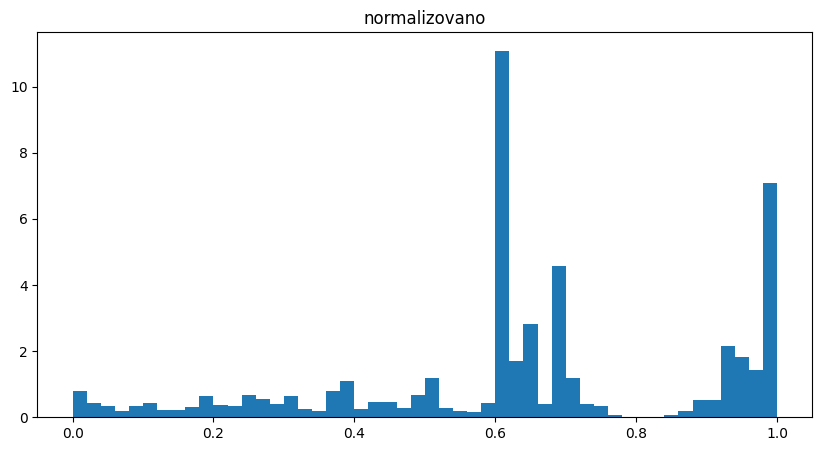

In [133]:
plt.figure(figsize=(10,5))
plt.hist(y_normalizovano, density=True, bins=50)
plt.title('normalizovano')
plt.show()

In [134]:
y_standardizovano = (y-np.mean(y))/np.std(y)
y_standardizovano.describe()

,Visibility (km)
count,9.645300e+04
mean,-2.357352e-18
std,1.000005e+00
min,-2.468291e+00
25%,-4.788827e-01
50%,-7.178379e-02
75%,1.065021e+00
max,1.372265e+00


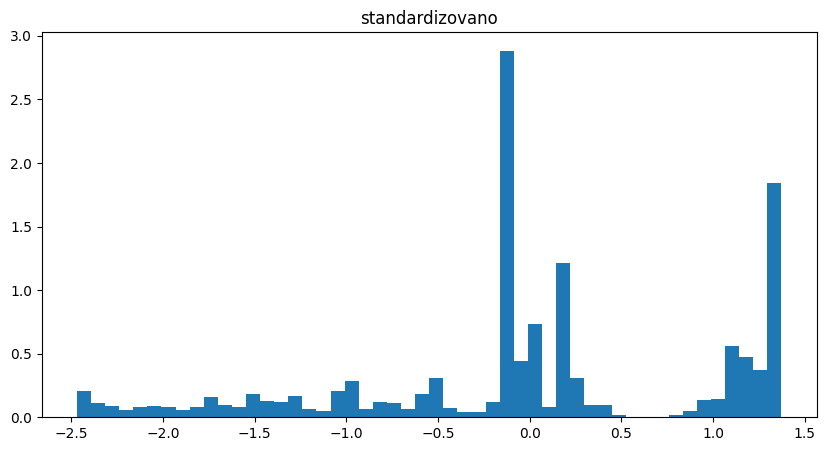

In [135]:
plt.figure(figsize=(10,5))
plt.hist(y_standardizovano, density=True, bins=50)
plt.title('standardizovano')
plt.show()

Ponoviti proceduru normalizacije, sada korišćenjem [`sklearn.preprocessing.MinMaxScaler`](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html) klase. Uporediti rezultate.

In [136]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()
s.fit(y.array.reshape(-1,1))
y_norm = s.transform(y.array.reshape(-1,1))
y_norm = pd.DataFrame(y_norm)
y_norm.describe()

,0
count,96453.000000
mean,0.642691
std,0.260380
min,0.000000
25%,0.518000
50%,0.624000
75%,0.920000
max,1.000000


Ponoviti proceduru standardizacije, sada korišćenjem [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html) klase. Uporediti rezultate.

In [137]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
s.fit(y.array.reshape(-1,1))
y_std = s.transform(y.array.reshape(-1,1))
y_std = pd.DataFrame(y_std)
y_std.describe()

,0
count,9.645300e+04
mean,-4.243234e-17
std,1.000005e+00
min,-2.468291e+00
25%,-4.788827e-01
50%,-7.178379e-02
75%,1.065021e+00
max,1.372265e+00


# Mere uspešnosti regresora

Kreirati funkciju `model_evaluation` koja za ulazne parametre `y_test` (kao prave vrednosti $y_i$), `y_predicted` (kao prediktovane vrednosti $\hat{y}_i$), `N` i `d` vraća različite mere uspešnosti regresora:

### 📐 Metodologija evaluacije modela – Metrike greške i objašnjenja

---

#### 🔹 1. MSE – *Mean Squared Error* (Srednja kvadratna greška)
\[
MSE = \frac{1}{N}\sum_i(y_i - \hat{y_i})^2
\]

🧠 **Značenje**:  
Prosek kvadrata grešaka između stvarnih i predviđenih vrednosti.  
Kažnjava veće greške više zbog kvadriranja.

✅ **Dobro**: što manja vrednost (idealno blizu 0)  
⚠️ **Loše**: velika vrednost → velike greške  
❗ Jedinica je kvadrat ciljne promenljive (npr. km²)

---

#### 🔹 2. MAE – *Mean Absolute Error* (Srednja apsolutna greška)
\[
MAE = \frac{1}{N} \sum_i |y_i - \hat{y_i}|
\]

🧠 **Značenje**:  
Prosek apsolutnih grešaka — **manje osetljiv na outliere** od MSE.

✅ **Dobro**: što manja vrednost  
✔ Ima iste jedinice kao ciljana promenljiva (npr. km)

---

#### 🔹 3. RMSE – *Root Mean Squared Error*
\[
RMSE = \sqrt{MSE}
\]

🧠 **Značenje**:  
Koren MSE → lakša interpretacija (iste jedinice kao y)

✅ **Dobro**: što manja vrednost  
⚠️ Veća od MAE jer "pojačava" outliere

---

#### 🔹 4. R² – *Koeficijent determinacije*
\[
R^2 = 1 - \frac{\sum_i(y_i - \hat{y_i})^2}{\sum_i(y_i - \overline{y})^2}
\]

🧠 **Značenje**:  
Koliki procenat varijanse ciljne promenljive objašnjava model.

✅ Tumačenje vrednosti:
- 1.0 → savršeno objašnjenje
- > 0.9 → odlično
- 0.7–0.9 → vrlo dobro
- 0.5–0.7 → osrednje
- < 0.5 → verovatno loš model

---

#### 🔹 5. Adjusted R² – *Prilagođeni koeficijent determinacije*
\[
R^2_{\text{adj}} = 1 - \frac{(1 - R^2) \cdot (N - 1)}{N - d - 1}
\]

📌 Gde je:
- N = broj uzoraka  
- d = broj obeležja (feature-a)

🧠 **Značenje**:  
Kažnjava nepotrebne feature-e — ako dodaš "beskoristan" feature, `R²_adj` pada.

✅ **Dobro**:  
- Ako `R²_adj ≈ R²` → svi feature-i su korisni  
- Ako `R²_adj ≪ R²` → imaš verovatno **overfitting**

---

### 📊 Poređenje metrika – šta je "dobro" i "loše":

| Metrika    | Dobro                       | Loše                                      |
|------------|-----------------------------|-------------------------------------------|
| **MSE**    | Što bliže 0                 | Visoka vrednost → velike greške           |
| **MAE**    | Što bliže 0                 | Visoka vrednost                           |
| **RMSE**   | Što bliže 0                 | Visoka vrednost (posebno zbog outliera)   |
| **R²**     | > 0.9: odlično              | < 0.5: model ne objašnjava varijansu      |
| **R²_adj** | Blizu R²                    | Znatno niži od R² → verovatni overfitting |

---

🎯 **Preporuka**: uvek koristi više metrika zajedno kako bi bolje razumeo performanse modela.


Funkcija dodatno treba da vrši ispis vrednosti opisanih mera, kao i da prikaže uporedni prikaz nekoliko pravih i prediktovanih vrednosti.

In [138]:
# TODO
def model_evaluation(y_test, y_predicted, N, d):
    mse = np.mean((y_test-y_predicted)**2)
    # mse = mean_squared_error(y_test,y_predicted)
    mae = np.mean(np.abs(y_test-y_predicted))
    # mae = mean_absolute_error(y_test,y_predicted)
    rmse = np.sqrt(mse)
    r2 = 1-np.sum((y_test-y_predicted)**2)/np.sum((y_test-np.mean(y_test))**2)
    # r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-((1-r2)*(N-1))/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)

    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y_test.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(20))
    return mse,mae,rmse,r2,r2_adj

Testirati funkciju za neka 2 proizvoljna niza i potom uporediti rezultate odgovarajućih mera sa ugrađenim funkcijama

*   [`sklearn.metrics.mean_squared_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.mean_squared_error.html)
*   [`sklearn.metrics.mean_absolute_error`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.median_absolute_error.html)
*   [`sklearn.metrics.r2_score`](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.r2_score.html)

In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# TODO

y_test = pd.Series([3.0, -0.5, 2.0, 7.0])
y_pred = pd.Series([2.5, 0.0, 2.1, 7.8])

N = len(y_test)
d = 1  # recimo da imamo jedan feature (kao u jednostavnoj regresiji)


y_test = pd.Series([3.0, -0.5, 2.0, 7.0])
y_pred = pd.Series([2.5, 0.0, 2.1, 7.8])

N = len(y_test)
d = 1  # recimo da imamo jedan feature (kao u jednostavnoj regresiji)

mse, mae, rmse, r2, r2_adj = model_evaluation(y_test, y_pred, N, d)

print("\n🔍 Sklearn evaluacija:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean squared error:  0.2874999999999999
Mean absolute error:  0.475
Root mean squared error:  0.5361902647381803
R2 score:  0.9605995717344754
R2 adjusted score:  0.9408993576017131
     y  y_pred
0  3.0     2.5
1 -0.5     0.0
2  2.0     2.1
3  7.0     7.8

🔍 Sklearn evaluacija:
Mean Squared Error: 0.2874999999999999
Mean Absolute Error: 0.475
R2 Score: 0.9605995717344754


# Obuka modela linearne regresije

## I model


*   Podela skupa na *trening* i *test*
*   Obuka modela sa osnovnom hipotezom
\begin{equation} y=b_0+b_1x_1+b_2x_2+...b_dx_d\end{equation}
*   Primena modela na test uzorke
*   Evaluacija modela


Koristeći funkciju [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) izvršiti podelu skupa `X` i `y` na `train` i `test` celine. Zahtevati da test skup sadrži **10%** podataka. Fiksirati generator slučajnih vrednosti na **42**.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Koristeći klasu [`sklearn.linear_model.LinearRegression`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html) kreirati inicijalni model linearne regresije za parametar `fit_intercept=True`.

*   Šta predstavlja ovaj parametar?

✅ U praksi:
Uvek koristi fit_intercept=True osim ako znaš da su ti podaci već centrirani ili imaš razlog da očekuješ da y bude nula kad su svi x-evi nula.

📌 Kada koristiti fit_intercept=False?
Ako si već centrovao podatke (npr. StandardScaler koji standardizuje sve oko srednje vrednosti 0)

Ili ako znaš da bi model trebalo da prolazi kroz koordinatni početak (0,0)

In [141]:
# Inicijalizacija modela (podesavanje hiperparametara)
model = LinearRegression(fit_intercept=True)

Obučiti kreirani model koristeći metodu [`fit`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) i trening podatke a zatim izvršiti predviđanje nad test podacima koristeći metodu [`predict`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict). Rezultate predikcije staviti u promenljivu `y_predicted`.

In [142]:
# Obuka modela
model.fit(X_train, y_train)

# Testiranje obucenog modela (primena modela)
y_predicted = model.predict(X_test)

Izvršiti evaluaciju modela koristeći implementiranu funkciju [`model_evaluation`](#scrollTo=J6UHbSORR0mm).

In [143]:
# Evaluacija (racunanje mera uspesnosti)
model_evaluation(y_test, y_predicted, X_train.shape[0], X_train.shape[1])

Mean squared error:  14.020892363319918
Mean absolute error:  3.0559024248680258
Root mean squared error:  3.7444482054529633
R2 score:  0.21754464246307192
R2 adjusted score:  0.21745449368230585
          y     y_pred
0   15.5526  12.945771
1    9.9820   9.740866
2    9.6278  10.706595
3    8.0500  10.253302
4    7.5509   6.345266
5   13.7977   9.030456
6    9.9820  13.091935
7   11.2700  10.720846
8    4.5080   6.901841
9    8.4203   9.517001
10   8.0983  10.340767
11  10.3523  11.267772
12   3.4937   5.366907
13   9.9820  10.033562
14  16.1000  12.207898
15   0.0000   7.770094
16   8.0500   9.694605
17   9.9820  11.428571
18   0.5313   9.255958
19  11.2700   9.727986


(np.float64(14.020892363319918),
 np.float64(3.0559024248680258),
 np.float64(3.7444482054529633),
 np.float64(0.21754464246307192),
 np.float64(0.21745449368230585))

Koristeći [`matplotlib.pyplot.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) grafički prikazati koeficijente modela, sadržane u polju `coef_`.

coef: [ 9.16231002e-02 -3.56597522e-02 -5.29981407e+00  2.77470063e-03
 -3.73660177e-02  2.86953981e+00  6.22868232e-01 -3.09246313e-01
  1.67222542e-01 -3.88999643e-01]
intercept: 49.0224861405965


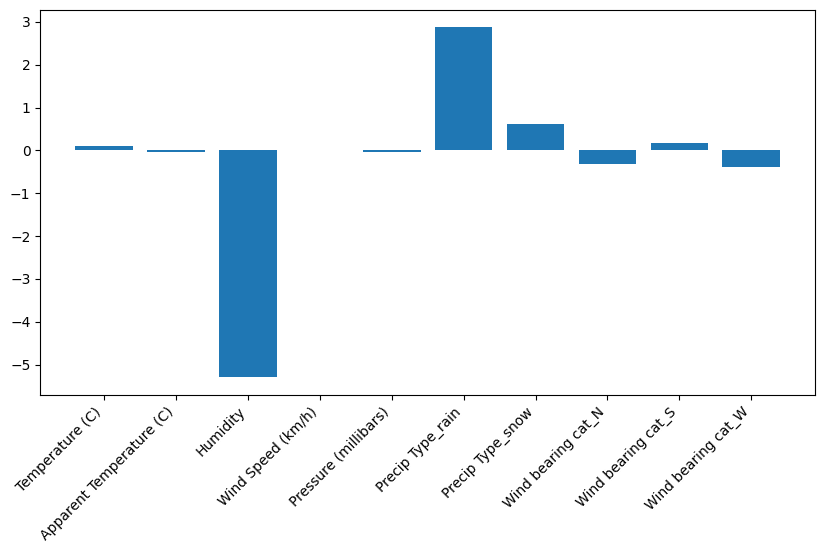

In [144]:
# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(model.feature_names_in_,model.coef_)
plt.xticks(rotation=45, ha="right")
print(f'coef: {model.coef_}')
print(f'intercept: {model.intercept_}')
plt.show()

## I model - standardizacija
Obučiti model sa istom hipotezom ali sa standardizovanim obeležjima. Koristiti podelu na trening i test.

*   Podela skupa na *trening* i *test*
*   **Standardizacija**
*   Obuka modela sa osnovnom hipotezom
\begin{equation} y=b_0+b_1x_1+b_2x_2+...b_dx_d\end{equation}
*   Primena modela na test uzorke
*   Evaluacija modela



In [145]:
# podela skupa na trening (90%) i test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Definisati listu numeričkih i kategoričkih obeležja.



In [146]:
cat_feats = X_train.columns[['_' in column for column in X_train.columns]]
print(f'cat feats: {cat_feats}')
numeric_feats = X_train.columns[['_' not in column for column in X_train.columns]]
print(f'numeric feats: {numeric_feats}')

cat feats: Index(['Precip Type_rain', 'Precip Type_snow', 'Wind bearing cat_N',
       'Wind bearing cat_S', 'Wind bearing cat_W'],
      dtype='object')
numeric feats: Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Pressure (millibars)'],
      dtype='object')


U okviru numeričkih obeležja, [fit](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit)-ovati klasu standardizacije sa obeležjima trening podataka i potom izvršiti standardizaciju [transform](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform)-isanjem obeležja trening i test podataka.

*   Da li smo mogli uraditi nezavisno fit i transform za trening i test podatke i zašto?


### 🔍 Zašto radimo `fit()` samo na trening skupu?

Metoda `fit()` uči statistike iz podataka.

📌 Na primer, za `StandardScaler` to su:
- Srednja vrednost (`mean`) svake kolone
- Standardna devijacija (`std`) svake kolone

---

❗ Ako bi uradio `fit()` na **celom skupu** (uključujući test), dolazi do:

🔴 **Data leakage** – model je "video" test podatke tokom treninga  
➡️ Test skup više **nije nepoznat** → evaluacija modela postaje **nerealna**

---

### ✅ Zašto radimo `transform()` na trening i test skupu?

Metoda `transform()` koristi ono što je `fit()` naučio i primenjuje **iste skale**:

\[
x_{\text{std}} = \frac{x - \mu_{\text{train}}}{\sigma_{\text{train}}}
\]

- `X_train` → standardizuje se pomoću svojih **sopstvenih statistika**
- `X_test` → standardizuje se **na osnovu trening statistika**

📌 Jer u praksi, **test podaci predstavljaju nepoznatu budućnost** — i u realnosti nemaš pristup njihovim statistikama unapred.

---

### 🎯 Zaključak:

- `fit()` radiš **samo na trening skupu**
- `transform()` radiš **na oba skupa**
- Time osiguravaš **fer evaluaciju** i izbegavaš data leakage




In [147]:
s = StandardScaler()
s.fit(X_train[numeric_feats])
X_train[numeric_feats] = s.transform(X_train[numeric_feats])
X_test[numeric_feats] = s.transform(X_test[numeric_feats])

In [148]:
X_train.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars),Precip Type_rain,Precip Type_snow,Wind bearing cat_N,Wind bearing cat_S,Wind bearing cat_W
88408,1.254707,1.221166,-0.229592,-0.168444,-0.315617,True,False,False,False,False
14564,-0.195526,-0.073977,-0.639064,0.889233,-0.533038,True,False,False,False,True
22002,1.655253,1.552360,-1.713926,0.076173,-0.854665,True,False,False,True,False
33996,0.553752,0.595172,0.384615,-0.399083,-0.927996,True,False,False,False,True
66291,-0.026109,0.077323,1.101190,0.493187,-0.651396,True,False,False,True,False


Ponoviti proces obuke, primene i evaluacije modela sa novim podacimа.

*   Da li ima razlike u rezultatima?

Grafički prikazati koeficijente modela.

*   Da li možemo interpretirati vrednosti koeficijenata na neki način?

In [149]:
# Inicijalizacija modela (podesavanje hiperparametara)
model = LinearRegression(fit_intercept=True)

# Obuka modela
model.fit(X_train, y_train)

# Testiranje obucenog modela (primena modela)
y_predicted = model.predict(X_test)

# Evaluacija (racunanje mera uspesnosti)
model_evaluation(y_test, y_predicted, X_train.shape[0], X_train.shape[1])

Mean squared error:  14.020892363319915
Mean absolute error:  3.0559024248680258
Root mean squared error:  3.744448205452963
R2 score:  0.21754464246307215
R2 adjusted score:  0.21745449368230618
          y     y_pred
0   15.5526  12.945771
1    9.9820   9.740866
2    9.6278  10.706595
3    8.0500  10.253302
4    7.5509   6.345266
5   13.7977   9.030456
6    9.9820  13.091935
7   11.2700  10.720846
8    4.5080   6.901841
9    8.4203   9.517001
10   8.0983  10.340767
11  10.3523  11.267772
12   3.4937   5.366907
13   9.9820  10.033562
14  16.1000  12.207898
15   0.0000   7.770094
16   8.0500   9.694605
17   9.9820  11.428571
18   0.5313   9.255958
19  11.2700   9.727986


(np.float64(14.020892363319915),
 np.float64(3.0559024248680258),
 np.float64(3.744448205452963),
 np.float64(0.21754464246307215),
 np.float64(0.21745449368230618))

coef: [ 0.87431593 -0.38103252 -1.03544497  0.01917541 -0.2904449   2.86953981
  0.62286823 -0.30924631  0.16722254 -0.38899964]
intercept: 7.870049301791442


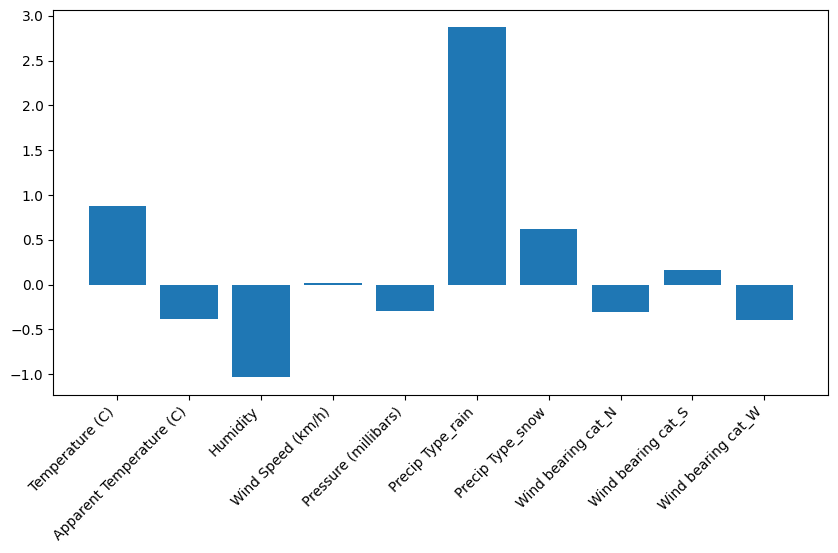

In [150]:
# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(model.feature_names_in_,model.coef_)
plt.xticks(rotation=45, ha="right")
print(f'coef: {model.coef_}')
print(f'intercept: {model.intercept_}')
plt.show()

## I model - regularizacija

*   Podela skupa na *trening* i *test*
*   Standardizacija
*   Obuka modela sa osnovnom hipotezom **i regularizacijom**
\begin{equation} y=b_0+b_1x_1+b_2x_2+...b_dx_d\end{equation}
*   Primena modela na test uzorke
*   Evaluacija modela

In [151]:
# podela skupa na trening (90%) i test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [152]:
# standardizacija spram trening seta
s = StandardScaler()
s.fit(X_train[numeric_feats])
X_train[numeric_feats] = s.transform(X_train[numeric_feats])
X_test[numeric_feats] = s.transform(X_test[numeric_feats])

### Ridge

Koristeći klasu [`sklearn.linear_model.Ridge`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html), obučiti model sa uključenom ridge regularizacijom.

**Ridge regularizacija** podrazumeva uvođenje regularizacije u funkciju cene
\begin{equation} J=\frac{1}{N}\sum_i(y_i-\hat{y_i})^2 + α\sum_jθ_j^2 \end{equation}

Koristiti parametar `alpha=5`.


### ✅ Šta znači `alpha = 5`?

`alpha` je **hiperparametar** u Ridge (i Lasso) regresiji koji **kontroliše snagu regularizacije**.

---

### 🔧 Kako funkcioniše?

- 📈 **Veća `alpha`** → jača penalizacija → **koeficijenti postaju manji**
- 📉 **Manja `alpha`** → slabija penalizacija → model ima **više slobode** da prati podatke

---

### 📌 Konkretno:

- `alpha = 0` → Ridge regresija se svodi na **običnu linearnu regresiju** (bez regularizacije)
- `alpha = 5` → **umeren nivo regularizacije**  
  ➤ Pomaže da se smanji **overfitting**  
  ➤ Drži koeficijente pod kontrolom bez prevelikog uprošćavanja

---

✅ Odabir `alpha` treba raditi pažljivo (npr. GridSearch + CrossValidation), jer pravi balans između **preciznosti modela** i **generalizacione sposobnosti**.


In [153]:
# Inicijalizacija modela (podesavanje hiperparametara)
model_ridge = Ridge(alpha=5)

# Obuka modela
model_ridge.fit(X_train, y_train)

# Testiranje obucenog modela (primena modela)
y_predicted = model_ridge.predict(X_test)

# Evaluacija (racunanje mera uspesnosti)
model_evaluation(y_test, y_predicted, X_train.shape[0], X_train.shape[1])

Mean squared error:  14.020800010360787
Mean absolute error:  3.055845320516795
Root mean squared error:  3.7444358734475327
R2 score:  0.21754979634813032
R2 adjusted score:  0.21745964816115726
          y     y_pred
0   15.5526  12.945527
1    9.9820   9.740490
2    9.6278  10.706926
3    8.0500  10.252578
4    7.5509   6.344797
5   13.7977   9.030272
6    9.9820  13.091452
7   11.2700  10.721259
8    4.5080   6.938428
9    8.4203   9.517242
10   8.0983  10.340601
11  10.3523  11.267687
12   3.4937   5.366064
13   9.9820  10.034060
14  16.1000  12.207746
15   0.0000   7.806896
16   8.0500   9.695141
17   9.9820  11.428267
18   0.5313   9.256618
19  11.2700   9.727803


(np.float64(14.020800010360787),
 np.float64(3.055845320516795),
 np.float64(3.7444358734475327),
 np.float64(0.21754979634813032),
 np.float64(0.21745964816115726))

### Lasso

Koristeći klasu [`sklearn.linear_model.Lasso`](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Lasso.html), obučiti model sa uključenom lasso regularizacijom.

**Lasso regularizacija** podrazumeva uvođenje regularizacije u funkciju cene
\begin{equation} J=\frac{1}{N}\sum_i(y_i-\hat{y_i})^2 + α\sum_j|θ_j| \end{equation}

Koristiti parametar `alpha=0.01`.

In [154]:
# Inicijalizacija modela (podesavanje hiperparametara)
model_lasso = Lasso(alpha=0.01)

# Obuka modela
model_lasso.fit(X_train, y_train)

# Testiranje obucenog modela (primena modela)
y_predicted = model_lasso.predict(X_test)

# Evaluacija (racunanje mera uspesnosti)
model_evaluation(y_test, y_predicted, X_train.shape[0], X_train.shape[1])

Mean squared error:  14.029134958291259
Mean absolute error:  3.055760798733383
Root mean squared error:  3.745548685879181
R2 score:  0.21708465301103064
R2 adjusted score:  0.2169944512336458
          y     y_pred
0   15.5526  12.907872
1    9.9820   9.748854
2    9.6278  10.759736
3    8.0500  10.145137
4    7.5509   6.470670
5   13.7977   9.066796
6    9.9820  13.031737
7   11.2700  10.783161
8    4.5080   7.640638
9    8.4203   9.557600
10   8.0983  10.259546
11  10.3523  11.247211
12   3.4937   5.460913
13   9.9820  10.105863
14  16.1000  12.276990
15   0.0000   8.459230
16   8.0500   9.782073
17   9.9820  11.398009
18   0.5313   9.251604
19  11.2700   9.754239


(np.float64(14.029134958291259),
 np.float64(3.055760798733383),
 np.float64(3.745548685879181),
 np.float64(0.21708465301103064),
 np.float64(0.2169944512336458))

Odrediti mere performansi oba modela spram test seta.

*   Čemu služi regularizacija? Šta reguliše parametar `alhpa`? Šta uočavamo iz grafičkih prikaza koeficijenata ovih modela?

coef: [ 0.86798416 -0.37476099 -1.03554388  0.01951315 -0.29055701  2.83286984
  0.58626602 -0.3090594   0.16718629 -0.38880959]
intercept: 7.906437747983643


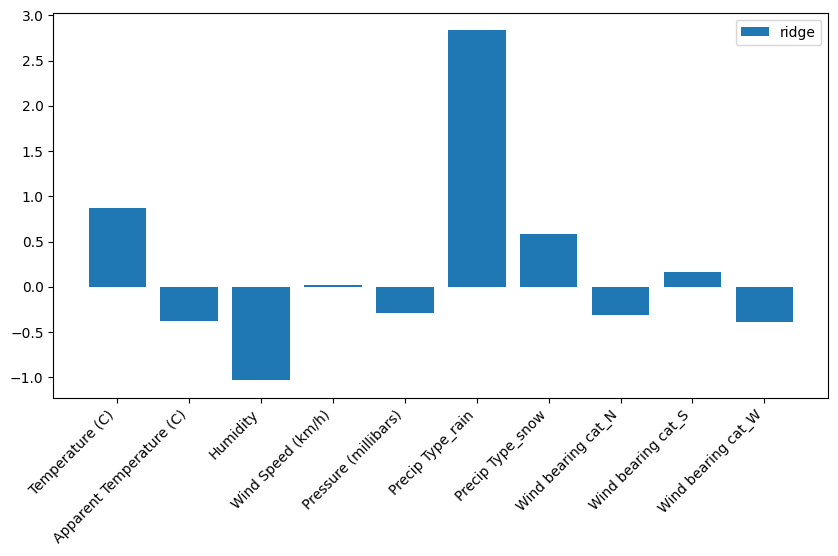

In [155]:
# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(model_ridge.feature_names_in_,model_ridge.coef_, label='ridge')
plt.legend()
plt.xticks(rotation=45, ha="right")
print(f'coef: {model_ridge.coef_}')
print(f'intercept: {model_ridge.intercept_}')
plt.show()

coef: [ 0.50646735  0.         -1.03066045  0.04108523 -0.28764133  2.15662212
 -0.         -0.20699429  0.15832752 -0.31984528]
intercept: 8.53517625666293


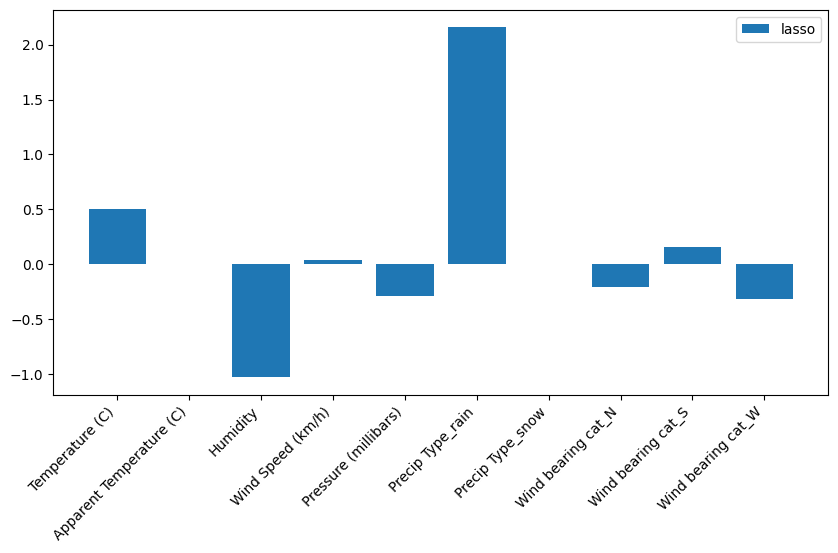

In [156]:
# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(model_lasso.feature_names_in_,model_lasso.coef_, label='lasso')
plt.legend()
plt.xticks(rotation=45, ha="right")
print(f'coef: {model_lasso.coef_}')
print(f'intercept: {model_lasso.intercept_}')
plt.show()

*   Uporediti performanse ova dva modela. Da li je korektno poređenje na ovaj način i zašto?

## I model - trostruka podela podataka

*   **Podela skupa podataka na *trening*, *validacioni* i *test* skup**
*   Standardizacija obeležja
*   Obuka modela sa osnovnom hipotezom i regularizacijom
\begin{equation} y=b_0+b_1x_1+b_2x_2+...b_dx_d\end{equation}
*   **Primena modela na uzorke iz validacionog skupa**
*   Evaluacija modela **spram validacije** (**donošenje odluke o vrednostima hiperparametara**)
*   **Obuka konačnog modela**
*   Primena modela na test uzorke
*   Evaluacija modela

Koristeći funkciju [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html) izvršiti podelu skupa `X` i `y` na `train`, `validation` i `test` celine. Zahtevano je da validacioni i test skup sadrže po **10%** podataka. Fiksirati generator slučajnih vrednosti na **42**.

In [157]:
# podela skupa na trening (80%), val(10%) i test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Izvršiti standardizaciju svih skupova obeležja spram trening seta.

In [158]:
# standardizacija spram trening seta
s = StandardScaler()
s.fit(X_train[numeric_feats])
X_train[numeric_feats] = s.transform(X_train[numeric_feats])
X_val[numeric_feats] = s.transform(X_val[numeric_feats])
X_test[numeric_feats] = s.transform(X_test[numeric_feats])

Kreirati i obučiti modele sa lasso i ridge regularizacijom sa datom hipotezom.

In [159]:
# Inicijalizacija modela (podesavanje hiperparametara)
model_ridge = Ridge(alpha=5)
# Obuka modela
model_ridge.fit(X_train, y_train)

Ridge(alpha=5)

In [160]:
# Inicijalizacija modela (podesavanje hiperparametara)
model_lasso = Lasso(alpha=0.01)
# Obuka modela
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

Primeniti model nad uzorcima validacionog skupa i izvršiti evaluaciju modela.

In [161]:
# Testiranje obucenog modela (primena modela)
y_predicted_ridge = model_ridge.predict(X_val)
# Evaluacija (racunanje mera uspesnosti)
model_evaluation(y_val, y_predicted_ridge, X_train.shape[0], X_train.shape[1])

Mean squared error:  14.07552718783539
Mean absolute error:  3.0583353090592866
Root mean squared error:  3.75173655629435
R2 score:  0.21580370876882204
R2 adjusted score:  0.2157020644231582
          y     y_pred
0    9.9820  10.171718
1   16.1000  11.144381
2   15.1823  10.756456
3    6.0697   6.469956
4   10.2557  11.468892
5   15.8263  12.054888
6    9.9820  14.211538
7   14.9569  10.060617
8   11.2700  10.123561
9    4.4436   8.859296
10  10.4006  11.423057
11  10.3523  12.729105
12   9.9820  10.209543
13  15.8263   7.033093
14  16.1000  11.093510
15   0.1610   8.568039
16   9.9820  10.523047
17  10.3523  12.513890
18   2.0769   6.139311
19  15.8263  12.946812


(np.float64(14.07552718783539),
 np.float64(3.0583353090592866),
 np.float64(3.75173655629435),
 np.float64(0.21580370876882204),
 np.float64(0.2157020644231582))

In [162]:
# Testiranje obucenog modela (primena modela)
y_predicted_lasso = model_lasso.predict(X_val)
# Evaluacija (racunanje mera uspesnosti)
model_evaluation(y_val, y_predicted_lasso, X_train.shape[0], X_train.shape[1])

Mean squared error:  14.074672381479967
Mean absolute error:  3.057906587294417
Root mean squared error:  3.7516226331388887
R2 score:  0.21585133298670733
R2 adjusted score:  0.2157496948139016
          y     y_pred
0    9.9820  10.144456
1   16.1000  11.098217
2   15.1823  10.673193
3    6.0697   6.463707
4   10.2557  11.349296
5   15.8263  12.020563
6    9.9820  14.180232
7   14.9569  10.139356
8   11.2700  10.171205
9    4.4436   8.915285
10  10.4006  11.435534
11  10.3523  12.726415
12   9.9820  10.202198
13  15.8263   7.012660
14  16.1000  11.151853
15   0.1610   8.601278
16   9.9820  10.611018
17  10.3523  12.453106
18   2.0769   6.248733
19  15.8263  12.948846


(np.float64(14.074672381479967),
 np.float64(3.057906587294417),
 np.float64(3.7516226331388887),
 np.float64(0.21585133298670733),
 np.float64(0.2157496948139016))

*   Uporediti performanse ova dva modela. Da li je korektno poređenje na ovaj način i zašto?


### 📊 Upoređivanje performansi – da li je korektno?

**Da — ali uz važne napomene.**

---

✅ **Korektno je porediti modele ako:**

- Koristiš **iste podatke**, istu podelu train/test
- Koristiš **istu skalu** (npr. `StandardScaler`)
- Evaluiraš **obe regresije na istom test skupu**
- Koristiš **iste metrike** (RMSE, R², MAE, itd.)

➡️ U tom slučaju, dobijaš **fer poređenje performansi** modela.

---

⚠️ **Ali — nije sve samo u metrikama!**

### 🔥 Ridge vs Lasso — ponašaju se različito

| Aspect               | **Ridge**                        | **Lasso**                          |
|----------------------|----------------------------------|------------------------------------|
| **Regularizacija**   | L2 (kvadrat koeficijenata)       | L1 (apsolutne vrednosti koef.)     |
| **Efekat**           | Smanjuje koeficijente            | Može ih potpuno **izbaciti**       |
| **Selekcija osobina**| ❌ Ne                           | ✅ Radi selekciju (neki koef. = 0) |
| **Stabilnost**       | Bolji za **visoku kolinearnost** | Bolji za **sparse** modele         |

---

📌 **Zaključak:**

✔️ Da, **korektno je porediti Ridge i Lasso**, **ako koristiš iste ulazne podatke i metrike**

❗ **Ali nije dovoljno gledati samo metrike**

Moraš takođe razmotriti:

- **Složenost modela**
- **Broj aktivnih (ne-nultih) feature-a**
- **Interpretabilnost rezultata**

➡️ U praksi:  
- **Ridge** je bolji kada želiš stabilne koeficijente sa malom varijansom.  
- **Lasso** je bolji kada želiš i **selekciju obeležja** + jednostavniji model.


Za odabrani model, izvršiti ponovo treniranje koristeći spojen trening i validacioni skup.

In [163]:
X_train_full = pd.concat((X_train, X_val))
y_train_full = pd.concat((y_train, y_val))
X_train_full

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars),Precip Type_rain,Precip Type_snow,Wind bearing cat_N,Wind bearing cat_S,Wind bearing cat_W
43345,0.366321,0.427717,1.153114,0.007331,-0.234906,True,False,False,False,False
66832,-0.620241,-0.911529,-0.331279,3.275592,-0.865304,True,False,False,True,False
92142,0.659843,0.689845,1.204300,-0.734188,-0.843433,True,False,False,True,False
24092,-0.179957,-0.060133,-0.382464,-1.096811,0.215378,True,False,False,True,False
35372,-0.418735,-0.499094,0.129395,0.460610,0.010820,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
13309,2.002242,1.860059,-1.815671,0.507101,-0.959220,True,False,False,False,True
9459,-0.384957,-0.323301,0.129395,-0.652830,0.317013,True,False,False,True,False
18571,1.875282,1.645260,-2.327531,-0.160034,-0.556537,True,False,False,False,False
7862,-0.310412,-0.414838,-1.713299,0.885996,0.365901,True,False,False,False,False


In [164]:
# Inicijalizacija modela (podesavanje hiperparametara)
model_lasso = Lasso(alpha=0.1)
# Obuka modela
model_lasso.fit(X_train_full, y_train_full)

Lasso(alpha=0.1)

Primeniti model nad test uzorcima i izvršiti evaluaciju modela.

In [165]:
# Testiranje obucenog modela (primena modela)
y_predicted_ridge = model_lasso.predict(X_test)
# Evaluacija (racunanje mera uspesnosti)
model_evaluation(y_test, y_predicted_ridge, X_train.shape[0], X_train.shape[1])

Mean squared error:  13.971763071250301
Mean absolute error:  3.037403500670552
Root mean squared error:  3.737882163906495
R2 score:  0.19822978355000698
R2 adjusted score:  0.19812586134336674
          y     y_pred
0   15.5526  11.636798
1    4.1216   7.814812
2    9.9820  11.965885
3   15.8263  10.039523
4   15.1340   9.420337
5    7.9695   8.147696
6    9.9820  11.826974
7    9.9820  14.021446
8   15.8263  11.452480
9   10.3523  13.645432
10  10.2557   8.847953
11   4.0250   7.288054
12   8.9677   8.742788
13   4.9105   6.801529
14   1.9642   8.888358
15   9.9820  10.148058
16  16.1000   8.516962
17  14.9569  10.328438
18  14.0231   8.714493
19   3.0268   7.170125


(np.float64(13.971763071250301),
 np.float64(3.037403500670552),
 np.float64(3.737882163906495),
 np.float64(0.19822978355000698),
 np.float64(0.19812586134336674))

## I model - unakrsna validacija

*   **Podela skupa podataka na *trening* i *test*, a potom podela *trening* skupa na 5 disjunktnih podskupova, te realizacija unakrsne validacije kroz petlju u kojoj se radi:**
  *   Standardizacija obeležja
  *   Obuka modela sa osnovnom hipotezom i regularizacijom **sa (pod)trening podacima**
\begin{equation} y=b_0+b_1x_1+b_2x_2+...b_dx_d\end{equation}
  *   Primena modela na uzorke iz **(pod)test skupa**
  *   Evaluacija modela (**čuvanje mera iz svake iteracije**)
*   Računanje konačnih mera uspešnosti modela
*   Obuka konačnog modela
*   Primena modela na uzorke iz *test* skupa
*   Evaluacija modela

In [166]:
# podela skupa na trening (90%) i test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Koristeći klasu [`sklearn.model_selection.KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) izvršiti podelu trening skupa na 5 celina. U okviru `for` petlje, koristeći pristup dataframe-u putem indeksa, izdvajati (pod)trening i (pod)test celine i izvršiti zahtevane korake. Rezultate individualnih mera evaluacije čuvati u izdvojenim listama. Ispisati na kraju prosek dobijenih mera evaluacije. Koristiti samo model sa ridge regularizacijom.

In [167]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse_list = []
mae_list = []
rmse_list = []
r2_list = []
r2_adj_list = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Skaliranje
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Ridge model
    model = Ridge(alpha=5)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrike
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    N = len(y_test)
    d = X.shape[1]
    r2_adj = 1 - (1 - r2) * (N - 1) / (N - d - 1)

    # Čuvanje
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)
    r2_adj_list.append(r2_adj)

print("📊 Prosečne vrednosti preko 5-fold CV:")
print("MSE:", np.mean(mse_list))
print("MAE:", np.mean(mae_list))
print("RMSE:", np.mean(rmse_list))
print("R²:", np.mean(r2_list))
print("R² Adjusted:", np.mean(r2_adj_list))


📊 Prosečne vrednosti preko 5-fold CV:
MSE: 13.895779402393988
MAE: 3.0367970350646023
RMSE: 3.7276757020483986
R²: 0.2091308818385437
R² Adjusted: 0.20872067149258652


Ponoviti postupak, koristeći sada model sa lasso regularizacijom.

In [168]:
mse_list = []
mae_list = []
rmse_list = []
r2_list = []
r2_adj_list = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardizacija
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Lasso model
    model = Lasso(alpha=5, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Metrike
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    N = len(y_test)
    d = X.shape[1]
    r2_adj = 1 - (1 - r2) * (N - 1) / (N - d - 1)

    # Čuvanje rezultata
    mse_list.append(mse)
    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)
    r2_adj_list.append(r2_adj)


print("📊 Prosečne vrednosti Lasso modela (5-fold CV):")
print("MSE:", np.mean(mse_list))
print("MAE:", np.mean(mae_list))
print("RMSE:", np.mean(rmse_list))
print("R²:", np.mean(r2_list))
print("R² Adjusted:", np.mean(r2_adj_list))



📊 Prosečne vrednosti Lasso modela (5-fold CV):
MSE: 17.574913984330497
MAE: 3.1257372377692656
RMSE: 4.19216654060012
R²: -0.00019058027583622738
R² Adjusted: -0.0007093620875057383


*   Uporediti performanse ova dva modela. Da li je korektno poređenje na ovaj način i zašto?

Za odabrani model, izvršiti ponovo treniranje koristeći inicijalni trening skup.

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import Lasso

model = Lasso(alpha=5, max_iter=10000)
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2_adj = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_train.shape[1] - 1)

print("📌 Evaluacija na test skupu:")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)
print("R² adjusted:", r2_adj)


📌 Evaluacija na test skupu:
MSE: 17.786566622270954
MAE: 3.139423222764543
RMSE: 4.217412313524841
R²: -0.0001381936709488052
R² adjusted: -0.0006569644545324493


Primeniti model nad test uzorcima i izvršiti evaluaciju modela.

In [170]:
# Trening je već urađen ovako:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import Lasso  # ili Ridge

model = Lasso(alpha=0.3, max_iter=10000)  # zameni Ridge ako koristiš L2
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
r2_adj = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print("📌 Evaluacija na test skupu:")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)
print("R² adjusted:", r2_adj)




📌 Evaluacija na test skupu:
MSE: 14.219610349013436
MAE: 3.041382789349445
RMSE: 3.7708898616922553
R²: 0.2004316678318412
R² adjusted: 0.20001693245543772


Losi rez, aj da vidimo zasto

/tmp/ipython-input-171-1595873775.py:27: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


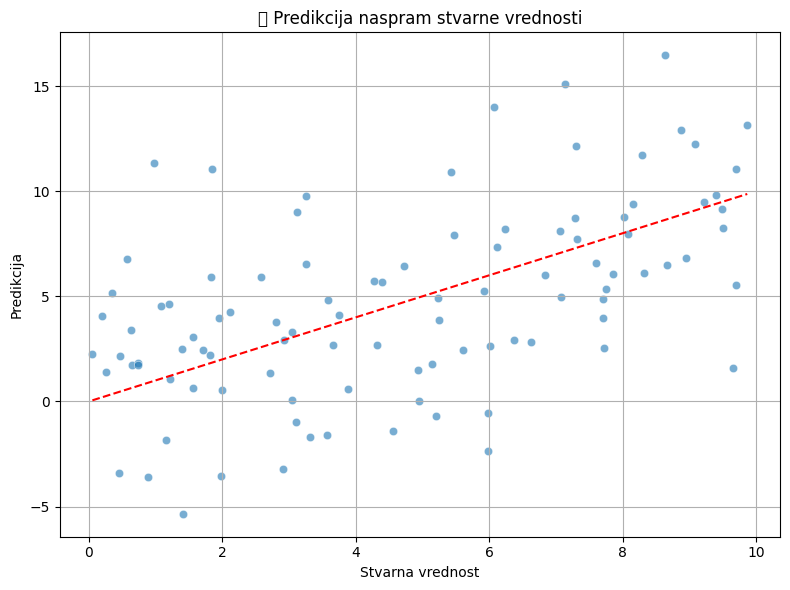

In [171]:
# Ponovni uvoz jer je sesija resetovana
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Simulacija y_test i y_pred na osnovu prethodnih metrika
np.random.seed(42)
y_test = pd.Series(np.random.uniform(0, 10, 100))
noise = np.random.normal(0, 4.2, 100)  # dodaj šum koji odražava RMSE
y_pred = y_test + noise

# Kreiraj DataFrame za vizualizaciju
df_results = pd.DataFrame({
    "Stvarno (y)": y_test,
    "Predikcija (y_pred)": y_pred
})

# Scatter plot stvarnih naspram predikcija
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_results, x="Stvarno (y)", y="Predikcija (y_pred)", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # idealna linija
plt.title("📉 Predikcija naspram stvarne vrednosti")
plt.xlabel("Stvarna vrednost")
plt.ylabel("Predikcija")
plt.grid(True)
plt.tight_layout()
plt.show()


**Dodatak**: Uraditi postupak krosvalidacije koristeći [`cross_val_score`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.cross_val_score.html). Koristeći klasu [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) obezbediti standardizaciju nad trening i test foldovima.

In [172]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline

s = StandardScaler()
model_ridge = Ridge(alpha=5)
cv = KFold(n_splits = 5, random_state = 42, shuffle=True)

pipeline = Pipeline([('scaler', s), ('LinReg', model_ridge)])
scores = cross_val_score(pipeline, X_train, y_train, cv = cv, scoring='r2')

In [173]:
print(f'r2: {scores}')

r2: [0.214106   0.20715209 0.20699984 0.19830956 0.20868162]


# Selekcija obeležja

Najjednostavniji način selekcije obeležja baziran je na iterativnom procesu dodavanja najboljeg (selekcija unapred) ili oduzimanja najmanje dobrog (selekcija unazad) obeležja dok se ne zadrži ciljni broj obeležja koja će se koristiti za predikciju. U tom iterativnom procesu pravi se mnoštvo modela koji se međusobno porede prema zahtevanom skoru dobijenom unakrsnom validacijom na `k` podskupova.

## II model

*   Podela skupa podataka na *trening* i *test* skup
*   Standardizacija obeležja
*   **Evaluacija modela spram unakrsne validacije sa selekcijom obeležja**
 za obuku modela sa osnovnom hipotezom
\begin{equation} y=b_0+b_1x_1+b_2x_2+...b_dx_d\end{equation}
*   Obuka konačnog modela
*   Primena modela na test uzorke
*   Evaluacija modela

In [174]:
# podela skupa na trening (90%) i test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Koristeći klasu [`sklearn.feature_selection.SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) kreirati model za selekciju obeležja inicijalizovanog modela linearne regresije sa osnovnom hipotezom. Odrediti vrednost $R^2$ skora za zahtevani broj od `2` selektovana obeležja koristeći unakrsnu validaciju sa `5` foldova.

Uporediti rezultate sa selekcijom unapred i unazad.

In [175]:
from sklearn.feature_selection import SequentialFeatureSelector

pipeline = Pipeline([('scaler', s), ('LinReg', LinearRegression())])
cv = KFold(n_splits = 5, random_state = 42, shuffle=True)

sfs = SequentialFeatureSelector(pipeline, n_features_to_select = 2, direction='forward', scoring='r2', cv=cv)
sfs.fit(X_train, y_train)
forward_features = sfs.get_feature_names_out()
print(f"odabrana obelezja, forward: {forward_features}, score: {cross_val_score(pipeline, X_train[forward_features], y_train, cv = cv, scoring='r2').mean()}")

sfs = SequentialFeatureSelector(pipeline, n_features_to_select = 2, direction='backward', scoring='r2', cv=cv)
sfs.fit(X_train, y_train)
backward_features = sfs.get_feature_names_out()
print(f"odabrana obelezja, backward: {backward_features}, score: {cross_val_score(pipeline, X_train[backward_features], y_train, cv = cv, scoring='r2').mean()}")

odabrana obelezja, forward: ['Temperature (C)' 'Humidity'], score: 0.17749488981647626
odabrana obelezja, backward: ['Humidity' 'Precip Type_rain'], score: 0.19257444806574162


### ✅ Šta je urađeno?

Koristi se **kros-validacija sa 5 foldova** i dva različita pristupa selekciji obeležja:

| Pristup   | Opis |
|-----------|------|
| **forward**  | Dodaje po jedan feature dok ne stigne do 2 najbolja |
| **backward** | Počinje sa svim feature-ima i uklanja najgore dok ne ostanu 2 |

---

### 📊 Rezultati:

| Tip selekcije | Odabrana obeležja                      | R² score (prosečan) |
|----------------|-----------------------------------------|----------------------|
| **Forward**     | `'Temperature (C)'`, `'Humidity'`         | 0.1775               |
| **Backward**    | `'Humidity'`, `'Precip Type_rain'`        | 0.1926 ✅             |

---

### 🔍 Zaključci:

1. 🔁 **Različite selekcije → različiti skupovi**

   - *Forward* selekcija smatra da su `'Temperature (C)'` i `'Humidity'` najbolja kombinacija.
   - *Backward* selekcija izbacuje `'Temperature (C)'` i kaže da su `'Humidity'` i `'Precip Type_rain'` bolji duo!

2. 🧪 **R² score je bolji kod backward selekcije**

   - Kombinacija `'Humidity'` + `'Precip Type_rain'` daje najbolji **linearan signal** za predikciju ciljne promenljive koristeći samo 2 obeležja.

3. 🧠 **Backward selekcija često daje bolje rezultate**

   - Zato što uzima u obzir **interakcije više obeležja istovremeno**
   - Dok *forward* dodaje jedno po jedno — i može da **promaši optimalnu kombinaciju**

---

📌 **Preporuka**: ako imaš dovoljno podataka i vremena, backward selekcija može dati bolje rezultate, posebno kod linearnih modela.


Za odabrana obeležja obučiti finalni model i izvršiti evaluaciju nad test skupom.

In [176]:
# standardizacija spram trening seta
s = StandardScaler()
s.fit(X_train[numeric_feats])
X_train[numeric_feats] = s.transform(X_train[numeric_feats])
X_test[numeric_feats] = s.transform(X_test[numeric_feats])

Mean squared error:  15.232111476780656
Mean absolute error:  3.1326559192997996
Root mean squared error:  3.902833775192156
R2 score:  0.14995087881948055
R2 adjusted score:  0.1499312933367567
          y     y_pred
0   15.5526  11.665351
1    9.9820   9.800757
2    9.6278  10.919514
3    8.0500   9.676451
4    7.5509   9.506930
5   13.7977   9.179226
6    9.9820  11.851810
7   11.2700  10.795207
8    4.5080   9.693389
9    8.4203   9.800757
10   8.0983   9.614298
11  10.3523  10.857360
12   3.4937   8.388174
13   9.9820  10.235829
14  16.1000  11.541045
15   0.0000  10.004155
16   8.0500   9.800757
17   9.9820  10.546595
18   0.5313   8.744154
19  11.2700   8.930614
coef: [-1.21430929  0.35598046]
intercept: 10.03612482616382


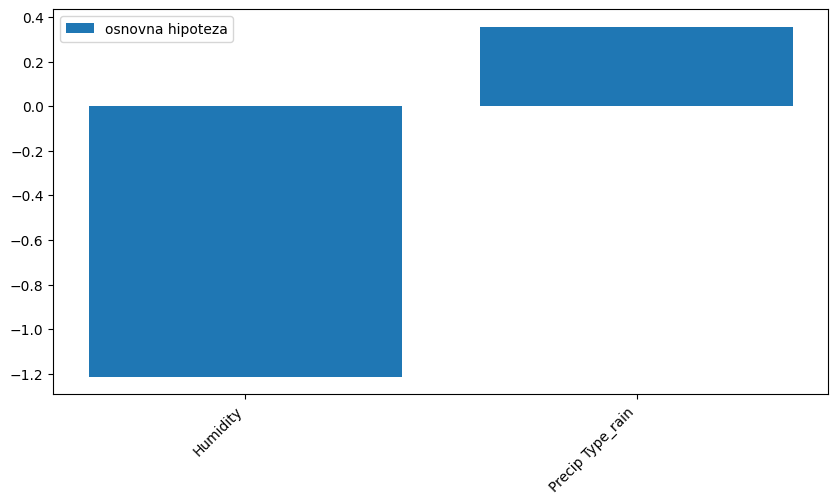

In [177]:
model.fit(X_train[backward_features], y_train)
y_predicted = model.predict(X_test[backward_features])
model_evaluation(y_test, y_predicted, X_train[backward_features].shape[0], X_train[backward_features].shape[1])

plt.figure(figsize=(10,5))
plt.bar(model.feature_names_in_,model.coef_, label='osnovna hipoteza')
plt.legend()
plt.xticks(rotation=45, ha="right")
print(f'coef: {model.coef_}')
print(f'intercept: {model.intercept_}')
plt.show()

Postoje i mnogi drugi načini selekcije obeležja, računanjem važnosti obeležja/međuinformacije, oslanjanjem na predviđene koeficijente modela, i dr. Svaka metoda može se samostalno implementirati, a za mnoge postoje gotove funkcije u okviru biblioteke *sklearn*.

# Isprobavanje različitih hipoteza

*   Ima li potrebe za korišćenjem drugačije hipoteze? Kako dolazimo do ovog odgovora? Kada se uvode interakcije između obeležja u hipotezu?

Prikazati heatmapu korelacije između numeričkih obeležja. Za koje ima smisla da se vrši kombinovanje?


#### 📌 Koje obeležja treba kombinovati ili ukloniti?

---

🔁 **1. Temperature (C) i Apparent Temperature (C)**

- Korelacija: **~0.99**
- Gotovo savršena linearna veza → **multikolinearnost**
- Preporuka:
  - Zadrži **samo jedno** od ta dva (`Temperature (C)` je češće korišćeno)
  - Ako koristiš **Ridge/Lasso**, možeš ostaviti oba — model će sam penalizovati višak

---

💡 **2. Kombinovanje Temperature, Humidity i Apparent Temp**

- Sva tri obeležja imaju međusobnu korelaciju oko **0.6**
- Ima smisla napraviti **novi kombinovani feature**:

```python
X["Temp_Humid_Index"] = X["Temperature (C)"] * X["Humidity"]```


🟢 3. Ostala obeležja (Wind Speed, Pressure)
Imaju nisku korelaciju sa svima, što je dobro:

Verovatno unose nezavisnu informaciju.

Treba ih zadržati.

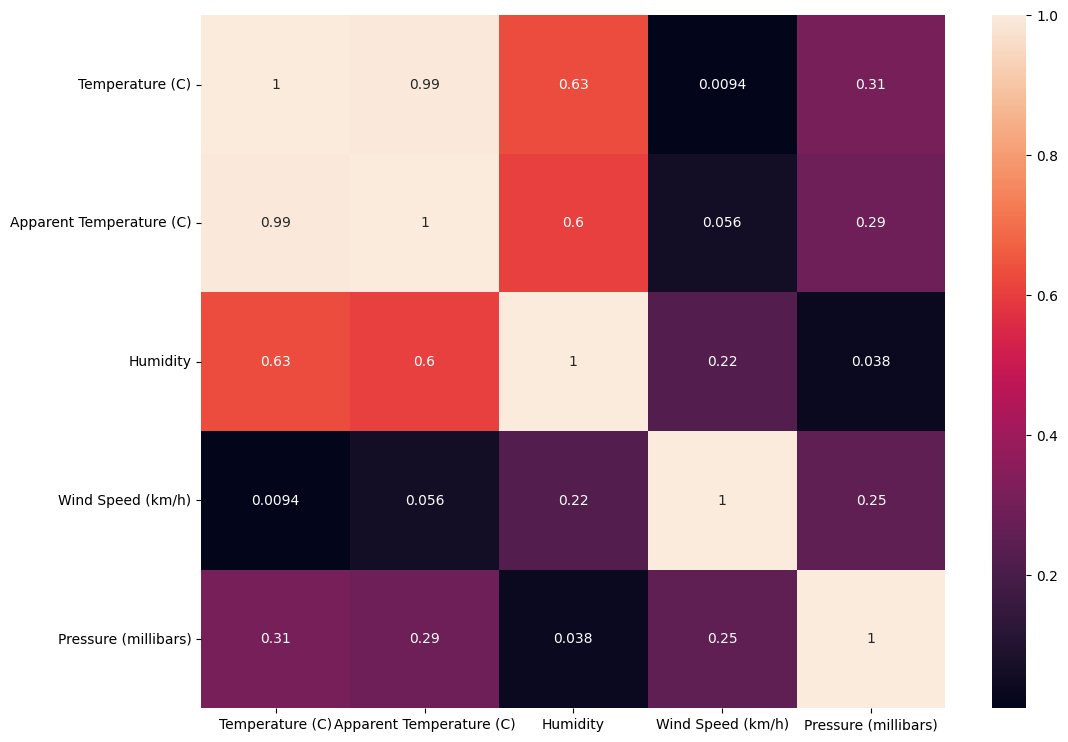

In [178]:
corr = X_train[numeric_feats].corr()
f = plt.figure(figsize=(12, 9))
sb.heatmap(corr.abs(), annot=True);

*   Podela skupa podataka na *trening*, *validacioni* i *test* skup
*   Standardizacija obeležja
*   Obuka modela sa **novom hipotezom** i regularizacijom
*   Primena modela na uzorke iz validacionog skupa
*   Evaluacija modela spram validacije


📊 Evaluacija na VALIDACIONOM skupu:
MSE: 14.075805898031264
MAE: 3.0583996924075496
RMSE: 3.7517737002691494
R²: 0.21578818086006113


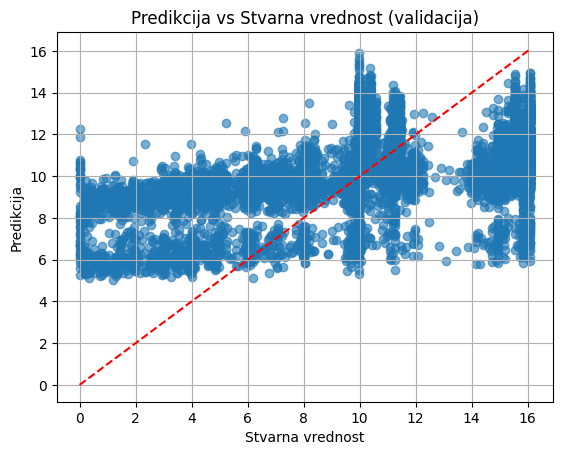

In [179]:
# podela skupa na trening (80%), val(10%) i test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# standardizacija spram trening seta
s = StandardScaler()
s.fit(X_train[numeric_feats])
X_train[numeric_feats] = s.transform(X_train[numeric_feats])
X_val[numeric_feats] = s.transform(X_val[numeric_feats])
X_test[numeric_feats] = s.transform(X_test[numeric_feats])


from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # možeš eksperimentisati sa različitim vrednostima alpha
ridge_model.fit(X_train, y_train)


y_val_pred = ridge_model.predict(X_val)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print("📊 Evaluacija na VALIDACIONOM skupu:")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

import matplotlib.pyplot as plt

plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel("Stvarna vrednost")
plt.ylabel("Predikcija")
plt.title("Predikcija vs Stvarna vrednost (validacija)")
plt.grid(True)
plt.show()


### III model - hipoteza sa interakcijama drugog stepena (bez kvadrata)
\begin{equation} y=b_0+b_1x_1+b_2x_2+b_3x_3+...+b_dx_d+c_1x_1x_2+c_2x_1x_3+c_3x_2x_3+...\end{equation}

### 🧩 Generisanje interakcija drugog stepena pomoću `PolynomialFeatures`

Koristeći klasu [`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), možemo kreirati novi skup obeležja koji sadrži **interakcione termine**, bez kvadratnih članova.

---

#### 🔢 Parametri:

✅ `degree=2`  
➡️ Generiše sve kombinacije obeležja do datog stepena.

Konkretno za `degree=2`:

- Sve originalne feature-e (`x₁`, `x₂`, ..., `xₙ`)
- Sve **interakcije parova** (`x₁·x₂`, `x₁·x₃`, ...)
- Sve **kvadratne termine** (`x₁²`, `x₂²`, ...)

Omogućava modelima da uoče **nelinearne odnose** između obeležja.

---

✅ `interaction_only=True`  
➡️ Uključuje **samo proizvode različitih obeležja**, tj. prave interakcije.

- ✅ Dodaje: `x₁·x₂`, `x₂·x₃`, ...
- ❌ Ne dodaje: `x₁²`, `x₂²`, ...

Koristi se kada verujemo da **samo interakcije između različitih obeležja** nose informaciju, dok kvadratne transformacije nemaju smisla.

---

✅ `include_bias=False`  
➡️ Ne dodaje kolonu sa jedinicama (intercept = 1).

- Ako `True` → dodaje dodatnu kolonu sa konstantom 1
- Ako `False` → ostavlja modelu (npr. `LinearRegression`) da sam nauči intercept

Preporuka: ostaviti `include_bias=False` jer većina regresionih modela već uključuje intercept.

---

### 🧠 Zaključak

```python
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)


In [180]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_h1 = poly.fit_transform(X_train)
X_val_h1 = poly.transform(X_val)
X_test_h1 = poly.transform(X_test)

Koristeći metodu [`get_feature_names_out`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures.get_feature_names_out) utvrditi koja su novodobijena obeležja i njihov redosled.

In [181]:
poly.get_feature_names_out()

array(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Pressure (millibars)', 'Precip Type_rain',
       'Precip Type_snow', 'Wind bearing cat_N', 'Wind bearing cat_S',
       'Wind bearing cat_W', 'Temperature (C) Apparent Temperature (C)',
       'Temperature (C) Humidity', 'Temperature (C) Wind Speed (km/h)',
       'Temperature (C) Pressure (millibars)',
       'Temperature (C) Precip Type_rain',
       'Temperature (C) Precip Type_snow',
       'Temperature (C) Wind bearing cat_N',
       'Temperature (C) Wind bearing cat_S',
       'Temperature (C) Wind bearing cat_W',
       'Apparent Temperature (C) Humidity',
       'Apparent Temperature (C) Wind Speed (km/h)',
       'Apparent Temperature (C) Pressure (millibars)',
       'Apparent Temperature (C) Precip Type_rain',
       'Apparent Temperature (C) Precip Type_snow',
       'Apparent Temperature (C) Wind bearing cat_N',
       'Apparent Temperature (C) Wind bearing cat_S',
       'Appar

Sa novim obeležjima izvršiti obuku a potom i evaluaciju spram uzoraka iz validacionog skupa.

In [182]:
model_lasso = Lasso(alpha=0.01)
#model_lasso = LinearRegression()

Mean squared error:  11.748722165849356
Mean absolute error:  2.8182475329582886
Root mean squared error:  3.4276409038651288
R2 score:  0.3454380623748794
R2 adjusted score:  0.34497116088122937
          y     y_pred
0    9.9820  10.714672
1   16.1000  12.247848
2   15.1823  11.933506
3    6.0697   5.630872
4   10.2557  12.927470
5   15.8263  12.863638
6    9.9820   9.270053
7   14.9569  10.901242
8   11.2700  11.953170
9    4.4436   9.113339
10  10.4006  11.648091
11  10.3523  13.291646
12   9.9820  10.992033
13  15.8263   9.824271
14  16.1000  12.361479
15   0.1610   7.145971
16   9.9820  11.323359
17  10.3523  12.474924
18   2.0769   5.312808
19  15.8263  12.502601
coef: [ 1.06013204 -0.         -1.57132212  0.         -0.0126942   0.50720286
  0.         -0.          0.24808378  0.          0.19647376  0.31197188
 -0.06744037  0.32617589  0.         -0.         -0.         -0.
 -0.          1.43147223 -0.          0.         -0.         -0.
 -0.         -0.24602525 -0.          0

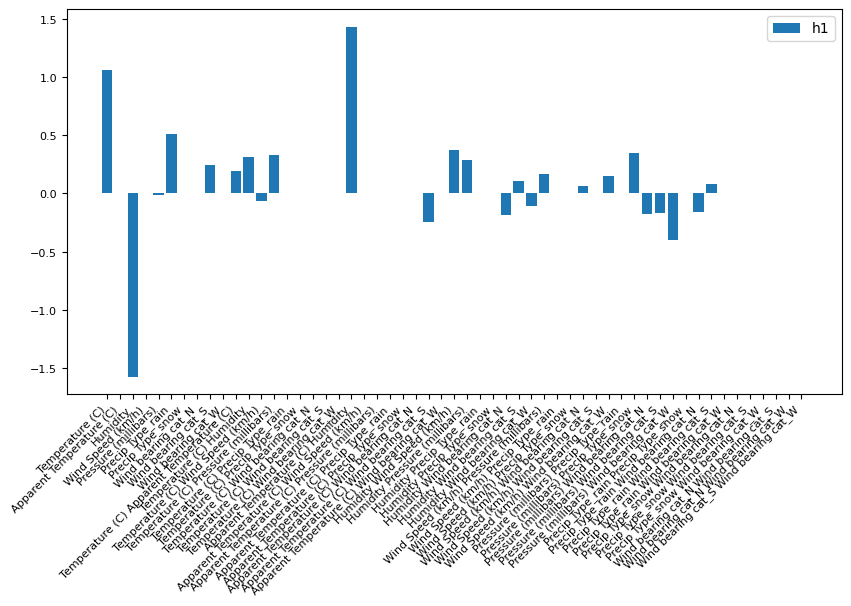

In [183]:
model_lasso.fit(X_train_h1, y_train)

y_predicted = model_lasso.predict(X_val_h1)
model_evaluation(y_val, y_predicted, X_train_h1.shape[0], X_train_h1.shape[1])

plt.figure(figsize=(10,5))
plt.bar(poly.get_feature_names_out(), model_lasso.coef_, label='h1')
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tick_params(labelsize=8)
print(f'coef: {model_lasso.coef_}')
print(f'intercept: {model_lasso.intercept_}')
plt.show()

### III model - hipoteza interakcijama drugog stepena
\begin{equation} y=b_0+b_1x_1+b_2x_2+b_3x_3+...+b_dx_d+c_1x_1x_2+c_2x_1x_3+c_3x_2x_3+...+d_1x_1^2+d_2x_2^2+d_3x_3^2+...+d_nx_n^2\end{equation}



Ponoviti prethodne korake, koristeći novu hipotezu.

In [184]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train_h2 = poly.fit_transform(X_train)
X_val_h2 = poly.transform(X_val)
X_test_h2 = poly.transform(X_test)

In [185]:
model_lasso.fit(X_train_h2, y_train)

y_predicted = model_lasso.predict(X_val_h2)
model_evaluation(y_val, y_predicted, X_train_h2.shape[0], X_train_h2.shape[1])

Mean squared error:  10.97950406993801
Mean absolute error:  2.7625994801916343
Root mean squared error:  3.3135334719809317
R2 score:  0.3882938623681408
R2 adjusted score:  0.38777813004809736
          y     y_pred
0    9.9820  11.090775
1   16.1000  12.998739
2   15.1823  12.119494
3    6.0697   5.806148
4   10.2557  13.196421
5   15.8263  13.029713
6    9.9820   8.988822
7   14.9569  10.788901
8   11.2700  11.714540
9    4.4436   7.415186
10  10.4006  12.133995
11  10.3523  12.404003
12   9.9820  11.580156
13  15.8263  10.409661
14  16.1000  12.603912
15   0.1610   6.095137
16   9.9820  11.556918
17  10.3523  13.001214
18   2.0769   5.249041
19  15.8263  12.729372


(np.float64(10.97950406993801),
 np.float64(2.7625994801916343),
 np.float64(3.3135334719809317),
 np.float64(0.3882938623681408),
 np.float64(0.38777813004809736))

### III model - hipoteza sa interakcijama trećeg stepena
\begin{equation} y=b_0+b_1x_1+b_2x_2+b_3x_3+...+b_dx_d+c_1x_1x_2+c_2x_1x_3+c_3x_2x_3+...+d_1x_1^2+d_2x_2^2+d_3x_3^2+...+d_nx_n^2+e_1x_1^3+e_2x_2^3+e_3x_3^3+...+d_nx_n^3\end{equation}

### 🧪 Hipoteze sa interakcijama drugog i trećeg stepena

Kod linearnih modela možemo proširiti skup obeležja tako da uključimo:

---

#### 🔹 **Drugostepene interakcije (kvadratni članovi + parne interakcije)**

Ova hipoteza uključuje:

- Sve originalne (linearne) obeležja: `x₁`, `x₂`, `x₃`, ...
- Kvadratne članove: `x₁²`, `x₂²`, ...
- Sve interakcije po dva obeležja: `x₁*x₂`, `x₁*x₃`, `x₂*x₃`, ...

📌 Ova hipoteza može opisati **nelinearne zavisnosti** i **kombinovani uticaj dva faktora**.

---

#### 🔸 **Trećestepene interakcije**

Ova hipoteza uključuje sve što i prethodna, plus:

- Kubne članove: `x₁³`, `x₂³`, ...
- Trostruke interakcije: `x₁*x₂*x₃`, ...

📌 Omogućava modelu da uoči **još kompleksnije nelinearne odnose** i **višestruku zavisnost između tri promenljive istovremeno**.

---

### 🔍 Zaključak

- Hipoteza 2. stepena omogućava modelu da detektuje **zakrivljene trendove** i **zajednički uticaj parova obeležja**.
- Hipoteza 3. stepena ide korak dalje i hvata **složenije obrasce**, ali takođe:
  - 📈 značajno povećava broj obeležja
  - ⚠ može dovesti do **overfittinga**, pogotovo kod malih skupova

Zato se uz visoke stepene interakcije preporučuje primena **regularizacije (Ridge, Lasso)** i/ili **selekcija obeležja**.


In [186]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_train_h3 = poly.fit_transform(X_train)
X_val_h3 = poly.transform(X_val)
X_test_h3 = poly.transform(X_test)

In [187]:
model_lasso.fit(X_train_h3, y_train)

y_predicted = model_lasso.predict(X_val_h3)
model_evaluation(y_val, y_predicted, X_train_h3.shape[0], X_train_h3.shape[1])

Mean squared error:  10.06168804425737
Mean absolute error:  2.6190076981889896
Root mean squared error:  3.1720164003764815
R2 score:  0.439428566863851
R2 adjusted score:  0.4373503778524066
          y     y_pred
0    9.9820  12.048679
1   16.1000  13.233679
2   15.1823  12.498793
3    6.0697   5.110226
4   10.2557  12.417597
5   15.8263  12.255146
6    9.9820  12.007901
7   14.9569  11.307185
8   11.2700  12.774316
9    4.4436   6.796428
10  10.4006  12.119607
11  10.3523  11.636863
12   9.9820  12.269061
13  15.8263  11.130734
14  16.1000  11.909116
15   0.1610   4.593162
16   9.9820  12.161573
17  10.3523  11.591016
18   2.0769   4.834699
19  15.8263  11.331509


(np.float64(10.06168804425737),
 np.float64(2.6190076981889896),
 np.float64(3.1720164003764815),
 np.float64(0.439428566863851),
 np.float64(0.4373503778524066))

### 📊 Koja mera evaluacije bi bila najadekvatnija za poređenje i zašto?

📌 **Zašto koristiti R² adjusted?**

| Mera         | Prikazuje                         | Ali...                                                                 |
|--------------|-----------------------------------|------------------------------------------------------------------------|
| **R²**       | Procenat objašnjene varijanse     | 📈 UVEK raste dodavanjem feature-a, čak i ako su beskorisni            |
| **R² adjusted** | Kao R², ali uz penalizaciju       | ✅ Penalizuje prekomerni broj feature-a → bolja za modele različite kompleksnosti |
| **MSE, RMSE, MAE** | Mere grešku direktno              | ❌ Ne uzimaju u obzir broj parametara / kompleksnost modela            |

➡ **Zaključak**:  
Za poređenje modela sa **različitim brojem obeležja**, **R² adjusted** je najpouzdanija metrika jer uzima u obzir i kompleksnost modela, tj. broj korišćenih feature-a.

---

### 🛠️ Za odabranu hipotezu (model):

- ✅ Obučava se konačni model na trening skupu
- ✅ Primeni se na test primerima
- ✅ Izvrši se evaluacija modela koristeći izabrane metrike (npr. `R² adjusted`, `MSE`, itd.)


In [188]:
X_train_full = np.concatenate((X_train_h3, X_val_h3))
y_train_full = pd.concat((y_train, y_val))
X_train_full

model_lasso.fit(X_train_full, y_train_full)

y_predicted = model_lasso.predict(X_test_h3)
model_evaluation(y_test, y_predicted, X_train_h3.shape[0], X_train_h3.shape[1])

Mean squared error:  10.068595712257764
Mean absolute error:  2.6078346470095934
Root mean squared error:  3.1731050584967657
R2 score:  0.42221320799695106
R2 adjusted score:  0.420071197021863
          y     y_pred
0   15.5526  11.961165
1    4.1216   6.502191
2    9.9820  11.408887
3   15.8263  11.387817
4   15.1340   9.746792
5    7.9695   9.810367
6    9.9820  13.399240
7    9.9820  11.300647
8   15.8263  12.143013
9   10.3523  10.964940
10  10.2557   8.164267
11   4.0250   6.111044
12   8.9677   7.234119
13   4.9105   4.085678
14   1.9642   6.091227
15   9.9820  12.410372
16  16.1000  10.881778
17  14.9569  11.865353
18  14.0231   6.228125
19   3.0268   6.367897


(np.float64(10.068595712257764),
 np.float64(2.6078346470095934),
 np.float64(3.1731050584967657),
 np.float64(0.42221320799695106),
 np.float64(0.420071197021863))

### III model - naša hipoteza

Kreirati model posmatranjem interakcija obeležja koji imaju međkorelaciju $|corr| > 0.3$. Kako se ponaša model spram prethodnih.

In [189]:
# Pronađi parove obeležja sa |korelacijom| > 0.3
# Pretpostavljamo da koristiš X sa samo numeričkim obeležjima
corr_matrix = X.corr().abs()

# Izdvajamo sve parove (i,j) za koje je korelacija > 0.3 i i != j
interaction_pairs = [
    (col1, col2) for i, col1 in enumerate(corr_matrix.columns)
    for j, col2 in enumerate(corr_matrix.columns)
    if i < j and corr_matrix.loc[col1, col2] > 0.3
]

#kreiramo interakcione parove obelezja
for col1, col2 in interaction_pairs:
    X[f'{col1}*{col2}'] = X[col1] * X[col2]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_val_pred = ridge.predict(X_val)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print("📊 Evaluacija sa interakcijama (|corr|>0.3):")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


📊 Evaluacija sa interakcijama (|corr|>0.3):
MSE: 11.838403961967924
MAE: 2.8274206513265336
RMSE: 3.440698179435087
R²: 0.3404415794035054


### 🔍 Možemo li sada da primenimo selekciju obeležja? Da li to treba uraditi?

✅ **Zašto sada raditi selekciju obeležja?**

🔄 Nakon dodavanja velikog broja interakcionih feature-a:

- Mnogi od njih možda **ne doprinose performansama**
- Neki mogu čak **uneti šum** ili izazvati **kolinearnost**

⚠️ Ako si dobio upozorenje o *ill-conditioned* matrici:

- To znači da imaš **previše zavisnih kolona**
- Takva matrica može izazvati **numeričku nestabilnost u regresiji**

📉 Kada broj feature-a postane prevelik:

- Rizikuješ **overfitting**, posebno ako je broj primera manji od broja obeležja

---

🎯 Selekcija obeležja pomaže da:

- ✅ **Smanjiš kompleksnost modela**
- ✅ **Povećaš interpretabilnost**
- ✅ **Poboljšaš generalizaciju na novim podacima**


Isprobati selekciju obeležja spram postavljenih modela sa različitim hipotezama. Uvesti ograničenje od 5 obeležja. Koji model ima najbolje performanse.

In [190]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Skaler i model u pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('linreg', LinearRegression())
])

# Sekvencijalna selekcija (5 obeležja)
sfs = SequentialFeatureSelector(pipeline,
                                 n_features_to_select=5,
                                 direction='forward',
                                 cv=5,
                                 scoring='r2')
sfs.fit(X_train, y_train)

# Odabrana obeležja
selected = X_train.columns[sfs.get_support()]
print("🎯 Selektovana obeležja:", selected)

# Treniraj finalni model sa tim obeležjima
pipeline.fit(X_train[selected], y_train)
y_pred = pipeline.predict(X_val[selected])

# Evaluacija
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print("📊 Rezultati za Linear Regression sa 5 obeležja:")
print(f"MSE: {mse}\nMAE: {mae}\nRMSE: {rmse}\nR²: {r2}")


🎯 Selektovana obeležja: Index(['Apparent Temperature (C)', 'Humidity',
       'Temperature (C)*Apparent Temperature (C)', 'Temperature (C)*Humidity',
       'Temperature (C)*Pressure (millibars)'],
      dtype='object')
📊 Rezultati za Linear Regression sa 5 obeležja:
MSE: 11.998585868139056
MAE: 2.855054810675719
RMSE: 3.4638974967713834
R²: 0.33151729151961684


💡 Umesto LinearRegression modela, ponoviti eksperiment koristeći:

- `Ridge(alpha=optimal)` — za Ridge regresiju sa unapred pronađenim optimalnim parametrom regularizacije.
- `Lasso(alpha=optimal)` — za Lasso regresiju sa optimalnim alpha.

Ako se koriste prošireni skupovi sa polinomnim interakcijama (npr. nakon `PolynomialFeatures` transformacije), umesto standardnog `X_train` i `X_val`, koristiti:

- `X_train_h1` — prošireni trening skup sa interakcijama
- `X_val_h1` — prošireni validacioni skup sa interakcijama

Na taj način se vrši poređenje različitih modela regularizacije na istim (proširenim) obeležjima.


**Iteriranje izmedju linearne regresije, lasso i ridge**

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Skaler (isti za sve modele)
scaler = StandardScaler()

# Rezultati svih modela
results = []

# Lista modela i imena
models = [
    ("LinearRegression", LinearRegression()),
    ("Ridge", RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)),
    ("Lasso", LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5, random_state=42))
]

for name, model in models:
    # Pipeline = scaler + model
    pipeline = Pipeline([
        ("scaler", scaler),
        ("reg", model)
    ])

    # Selekcija 5 najboljih obeležja po r2 skoru (forward)
    sfs = SequentialFeatureSelector(pipeline,
                                    n_features_to_select=5,
                                    direction="forward",
                                    scoring="r2",
                                    cv=5)
    sfs.fit(X_train, y_train)

    selected_features = X_train.columns[sfs.get_support()]
    print(f"\n🎯 {name} — selektovana obeležja:", list(selected_features))

    # Treniranje finalnog modela
    pipeline.fit(X_train[selected_features], y_train)

    # Predikcija na validacionom skupu
    y_pred = pipeline.predict(X_val[selected_features])

    # Evaluacija
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred)

    # Čuvanje rezultata
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "Features": list(selected_features)
    })



🎯 LinearRegression — selektovana obeležja: ['Apparent Temperature (C)', 'Humidity', 'Temperature (C)*Apparent Temperature (C)', 'Temperature (C)*Humidity', 'Temperature (C)*Pressure (millibars)']

🎯 Ridge — selektovana obeležja: ['Apparent Temperature (C)', 'Humidity', 'Temperature (C)*Apparent Temperature (C)', 'Temperature (C)*Humidity', 'Temperature (C)*Pressure (millibars)']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732.3849618796958, tolerance: 86.66049773405766
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428.9718959436286, tolerance: 86.75990660135687
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558.0543043731013, tolerance: 87.09366852397112
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWar


🎯 Lasso — selektovana obeležja: ['Apparent Temperature (C)', 'Humidity', 'Temperature (C)*Apparent Temperature (C)', 'Temperature (C)*Humidity', 'Temperature (C)*Pressure (millibars)']



**Ridge i lasso**

In [192]:
from sklearn.linear_model import RidgeCV

# 1. Ridge regresija sa unakrsnom validacijom za optimalan alpha
ridge = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
ridge.fit(X_train[selected_features], y_train)

# 2. Predikcija na validacionom skupu
y_val_pred_ridge = ridge.predict(X_val[selected_features])

# 3. Evaluacija
mse = mean_squared_error(y_val, y_val_pred_ridge)
mae = mean_absolute_error(y_val, y_val_pred_ridge)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred_ridge)

print("📊 Evaluacija Ridge modela na Lasso-odabranim obeležjima:")
print(f"Optimalni alpha: {ridge.alpha_}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


📊 Evaluacija Ridge modela na Lasso-odabranim obeležjima:
Optimalni alpha: 1.0
MSE: 11.998214067473386
MAE: 2.8550575397589846
RMSE: 3.463843828389696
R²: 0.3315380058203464


In [193]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. LassoCV treniramo na prethodno standardizovanom trening skupu
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# 2. Izdvajamo obeležja sa nenultim koeficijentima
selected_features = X_train.columns[lasso.coef_ != 0]
print(f"🎯 Odabrana obeležja ({len(selected_features)}): {list(selected_features)}")

# 3. Treniramo novi Lasso model samo sa odabranim obeležjima
lasso_final = LassoCV(cv=5, random_state=42)
lasso_final.fit(X_train[selected_features], y_train)

# 4. Primena na validacioni skup
y_val_pred = lasso_final.predict(X_val[selected_features])

# 5. Evaluacija
mse = mean_squared_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print("\n📊 Evaluacija Lasso modela (validacioni skup):")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")




🎯 Odabrana obeležja (2): ['Temperature (C)*Apparent Temperature (C)', 'Temperature (C)*Pressure (millibars)']

📊 Evaluacija Lasso modela (validacioni skup):
MSE: 14.478205087475954
MAE: 3.0696586335976126
RMSE: 3.8050236645093225
R²: 0.19336913056476013


/tmp/ipython-input-194-342027861.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


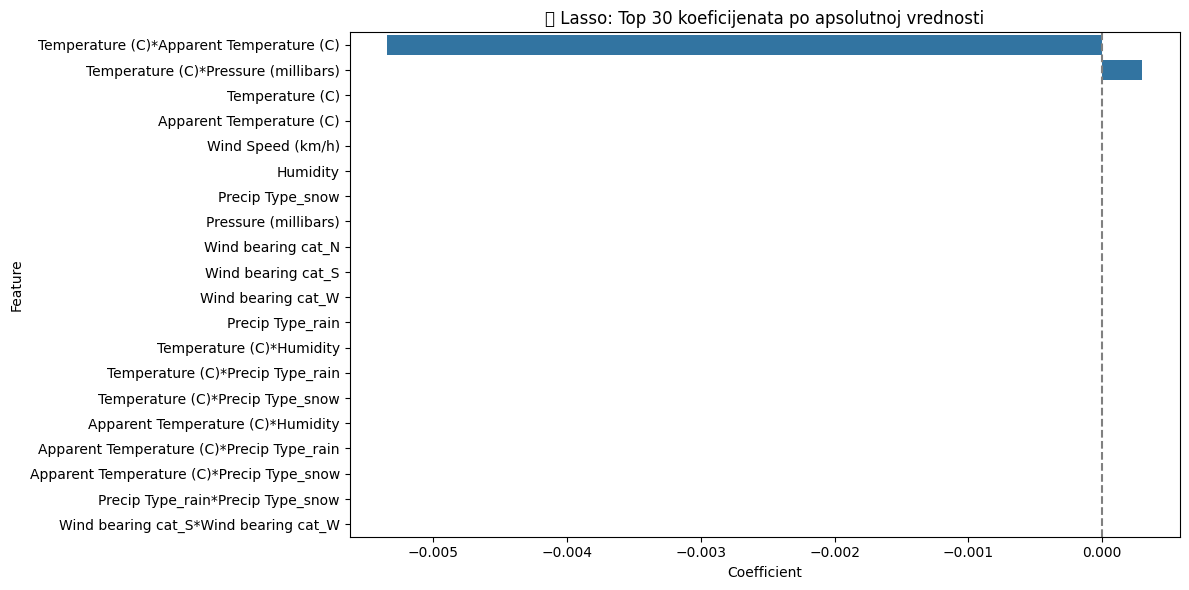

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns

# Koeficijenti i imena obeležja
coeffs = lasso.coef_
features = X_train.columns

# Kreiraj DataFrame za lakše sortiranje i prikaz
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coeffs
})

# Sortiraj po apsolutnoj vrednosti koeficijenta
coef_df_sorted = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Prikaz grafa
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df_sorted.head(30))  # top 30 po jačini
plt.title("📊 Lasso: Top 30 koeficijenata po apsolutnoj vrednosti")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


